In [1]:
from sympy import symbols
from numpy import linspace
from sympy import lambdify, Function
import matplotlib.pyplot as mpl
import sympy as sp
import sys

In [6]:
def TanhMethodMMS(n,B):
    RightKink  = []
    LeftKink   = []
    A          = []
    max_amplitude = 0.75
    S_vertical = 1
    
    rj = list(linspace(1,0,n))
    r_min = 0
    r_max = 1
    # rescaling the radius (redundant but needed for BC Fairing Function)
    r_hat = (r - r_min)/(r_max - r_min)
    warning_mssg = {1:'Warning: Total Amplitude exceeds maximum ', \
                    2:'Warning: Function is negative'}
    
    # getting amplitude for each kink
    for i in range(len(rj)):
        A.append(max_amplitude/(len(rj)+1))
        if sum(A) > max_amplitude:
            sys.exit(str(warning_mssg[1]))
    
    # defining kinks and antikinks
    for j in range(len(rj)):
        RightKink.append( A[j]*sp.tanh(B*( r_hat    - rj[j] )) )
        LeftKink.append(  A[j]*sp.tanh(B*( rj[j]- rj[0] )) )   
    
    y = sum(LeftKink) + sum(RightKink) + S_vertical
    lam_x = lambdify(r,f , modules=['numpy'])
    
    x_vals = linspace(r_min, r_max, 100)
    y_vals = lam_x(x_vals)
    
    if debug == 1:
        for i in range(len(y_vals)):
            if y_vals[i] < 0:
                sys.exit(str(warning_mssg[2]))
            
    mpl.plot(x_vals, y_vals)
    mpl.show()
    return y

In [7]:
r = sp.IndexedBase('r')
n = 5 # number of kinks
B = 50 

debug = 0

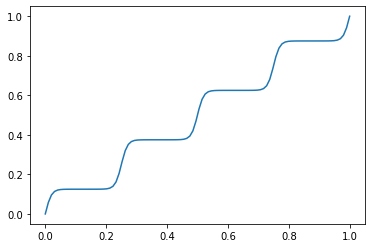

0.125*tanh(50*r - 50.0) + 0.125*tanh(50*r - 37.5) + 0.125*tanh(50*r - 25.0) + 0.125*tanh(50*r - 12.5) + 0.125*tanh(50*r) + 0.500000000003472


In [8]:
f = TanhMethodMMS(n,B)
print(f)
